In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
# import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [3]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [5]:
# reading data into dataframe
telco= pd.read_csv("C:/Users/tejan/Desktop/Data Analystics/class work/python stats class 20 (Clustering & PCA-FA)/1. Segmentation - Telecom - Class files/telco_csv.csv")

In [6]:
telco.head(10)
telco.shape

(1000, 30)

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
retire      1000 non-null int64
gender      1000 non-null int64
reside      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
callwait    1000 non-null int64
forward     1000 non-null int64
confer      1000 non-null int64
longmon     1000 non-null float64
tollmon     1000 non-null float64
equipmon    1000 non-null float64
cardmon     1000 non-null float64
wiremon     1000 non-n

In [8]:
telco.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,1.000000,4.000000


In [8]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(telco)

Number of variables,30
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,234.5 KiB
Average record size in memory,240.1 B
Numeric,12
Categorical,0
Boolean,16
Date,0
Text (Unique),0
Rejected,2


In [9]:
### Exporting pandas profiling output to html file

output = pandas_profiling.ProfileReport(telco)

output.to_file(outputfile='pandas_profiling.html')

In [9]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill', 'custcat']
[]


In [10]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [11]:
telco_cat = telco[cat_var_names]
telco_cat.head(5)

""
0
1
2
3
4


In [12]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(var_summary)

In [13]:
num_summary

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
N,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,2022.000000,35526.000000,41684.000000,495.000000,11551.000000,77535.000000,2671.000000,10987.000000,47.000000,517.000000,...,485.000000,493.000000,502.000000,11723.100000,13274.000000,14219.800000,13781.000000,11583.900000,371.000000,2487.000000
MEAN,2.022000,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
MEDIAN,2.000000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
STD,0.816200,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
VAR,0.666182,456.241566,157.723868,0.250225,101.741140,11458.453228,1.494253,101.648479,0.044836,0.249961,...,0.250025,0.250201,0.250246,107.401848,285.681731,363.609172,198.373037,388.855747,0.233593,1.255086
MIN,1.000000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P1,1.000000,1.000000,20.000000,0.000000,0.000000,10.990000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.650000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
P5,1.000000,4.000000,23.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.997500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [14]:
#Handling Outliers - at 99%tile or 95%tile if required after including some particular vars like income
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

telco_num=telco_num.apply(lambda x: outlier_capping(x))

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [15]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [16]:
telco_num.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
region,1.000000,0.016388,0.012903,-0.080637,0.009533,0.023223,-0.057952,0.016618,0.005595,0.050596,...,0.010620,0.017541,-0.017269,0.001482,0.020740,-0.014371,-0.005019,0.009639,0.030039,-0.023771
tenure,0.016388,1.000000,0.490613,0.154171,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,...,0.086777,0.085884,0.133585,0.755250,0.239342,-0.064180,0.445672,0.095382,-0.157095,0.166691
age,0.012903,0.490613,1.000000,-0.011957,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,...,0.074877,0.082868,0.122958,0.409538,0.184097,-0.126281,0.288360,0.039280,-0.144105,0.059187
marital,-0.080637,0.154171,-0.011957,1.000000,-0.010709,-0.021195,0.001400,-0.001556,-0.078109,0.008345,...,0.023712,0.043866,0.006040,0.132886,0.063841,0.013961,0.107968,0.051942,-0.056495,0.083836
address,0.009533,0.523968,0.658073,-0.010709,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,...,0.058743,0.080751,0.089632,0.471009,0.163823,-0.115242,0.275419,0.014713,-0.130124,0.069913
income,0.023223,0.290927,0.388719,-0.021195,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,...,0.144545,0.143558,0.174063,0.244525,0.208104,0.014707,0.169074,0.154315,-0.029922,0.171062
ed,-0.057952,-0.109797,-0.154199,0.001400,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,...,0.014027,0.029790,0.016628,-0.094830,-0.009181,0.462110,-0.065124,0.320090,0.405040,0.193864
employ,0.016618,0.520351,0.671798,-0.001556,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,...,0.151557,0.116052,0.168114,0.464180,0.247376,-0.161682,0.287433,0.037884,-0.181322,0.110760
retire,0.005595,0.171143,0.419562,-0.078109,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,...,0.049210,0.036188,0.060538,0.256609,0.092848,-0.093175,0.111980,-0.026163,-0.082524,0.008908
gender,0.050596,0.023533,-0.013114,0.008345,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,...,-0.031012,-0.035548,-0.002137,0.005925,0.000980,0.001961,-0.023430,0.011810,-0.015771,-0.004966


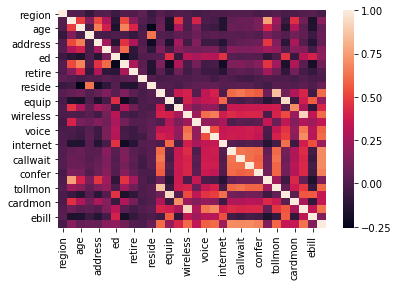

In [17]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(telco_num.corr())

### Standardrizing data 
- To put data on the same scale 

In [18]:
telco_num.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [19]:
#drop some variables looks numerical nature but they are not numerical (eg: Region, Custcat)

telco_num.drop(['marital','region','custcat'], axis=1, inplace=True)

In [20]:
telco_num.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'retire',
       'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'ebill'],
      dtype='object')

In [21]:
sc=StandardScaler()

telco_scaled=sc.fit_transform(telco_num)

In [22]:
pd.DataFrame(telco_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.055125,0.189446,-0.252674,-0.126231,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,-0.949284,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,-0.453208,0.802534,1.906227,-0.597197,-0.222076,-1.034598,2.607427,1.053425,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,1.251336,0.544543,-1.367671,1.811218,-0.222076,0.966559,-0.229045,1.053425,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,0.048128,-0.526115,-0.549196,-1.098950,-0.222076,0.966559,-0.938163,-0.949284,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,-0.252674,-0.564814,-1.367671,-0.898249,-0.222076,-1.034598,1.189191,-0.949284,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
5,0.256404,-0.212792,0.549465,0.054362,-0.549196,0.506660,-0.222076,0.966559,-0.938163,1.053425,...,1.038750,1.030464,-0.986097,-1.004008,0.025619,0.390189,-0.749071,-0.009650,-0.598794,-0.768001
6,0.443765,-1.580398,-0.954544,-0.706708,-0.549196,-0.697547,-0.222076,0.966559,1.898309,-0.949284,...,-0.962695,1.030464,-0.986097,-1.004008,-0.070102,-0.824695,-0.749071,-0.364289,-0.598794,1.302082
7,0.115883,-0.534581,-0.653743,0.028563,-0.549196,-0.095443,-0.222076,-1.034598,0.480073,1.053425,...,1.038750,1.030464,1.014099,0.996008,-0.585931,2.015295,1.899915,0.718293,2.809212,1.302082
8,0.443765,1.396158,-0.453208,1.189519,1.087753,2.011920,-0.222076,-1.034598,1.898309,1.053425,...,1.038750,1.030464,1.014099,0.996008,-0.192412,0.973965,-0.749071,-0.121641,-0.598794,-0.768001
9,1.521092,-0.051897,0.950534,-0.023035,-1.367671,1.108764,-0.222076,-1.034598,0.480073,-0.949284,...,-0.962695,-0.970437,-0.986097,-1.004008,1.339121,-0.824695,-0.749071,0.214332,-0.598794,-0.768001


In [23]:
pd.DataFrame(telco_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.512124e-16,3.602674e-17,4.796163e-17,4.113376e-17,1.661449e-16,1.335598e-16,3.025358e-16,-2.111644e-16,-1.275091e-16,5.364598e-16,...,-2.176037e-17,2.331468e-18,-5.118128e-17,-2.153833e-17,-7.077672e-18,7.649437e-17,-2.380318e-16,-9.711676e-17,-2.975398e-17,2.264855e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.617209e+00,-1.741293e+00,-1.155079e+00,-8.100333e-01,-1.367671e+00,-1.098950e+00,-2.220764e-01,-1.034598e+00,-9.381632e-01,-9.492843e-01,...,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-1.053899e+00,-8.246952e-01,-7.490708e-01,-1.017571e+00,-5.987943e-01,-7.680007e-01
25%,-8.677637e-01,-7.759238e-01,-8.542771e-01,-5.777133e-01,-5.491964e-01,-7.978979e-01,-2.220764e-01,-1.034598e+00,-9.381632e-01,-9.492843e-01,...,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-6.763338e-01,-8.246952e-01,-7.490708e-01,-1.017571e+00,-5.987943e-01,-7.680007e-01
50%,-7.147832e-02,-1.323441e-01,-2.526735e-01,-3.455222e-01,2.692781e-01,-2.961447e-01,-2.220764e-01,9.665588e-01,-2.290451e-01,-9.492843e-01,...,-9.626953e-01,-9.704368e-01,-9.860966e-01,9.960080e-01,-3.226987e-01,-8.246952e-01,-7.490708e-01,-1.216411e-01,-5.987943e-01,-7.680007e-01
75%,8.653280e-01,7.525780e-01,6.497319e-01,1.188599e-01,1.087753e+00,6.070109e-01,-2.220764e-01,9.665588e-01,4.800729e-01,1.053425e+00,...,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,3.034748e-01,7.057438e-01,9.151374e-01,5.129756e-01,6.988998e-01,1.302082e+00
max,1.708454e+00,2.281884e+00,3.156414e+00,4.988164e+00,1.906227e+00,2.916079e+00,4.502954e+00,9.665588e-01,2.607427e+00,1.053425e+00,...,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,4.292373e+00,3.183793e+00,2.500299e+00,3.611398e+00,2.988408e+00,1.302082e+00


### Applyting PCA

In [24]:
pc = PCA(n_components=27)

In [25]:
pc.fit(telco_scaled)

PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pc.explained_variance_  #Eigen value

array([6.65731991, 4.91293409, 2.87933311, 1.38743915, 1.18273672,
       1.02799942, 0.91580463, 0.82720747, 0.76373651, 0.68092016,
       0.59219189, 0.58817628, 0.53758645, 0.47868986, 0.4586214 ,
       0.43754371, 0.42435531, 0.38930407, 0.36123528, 0.35068851,
       0.30274412, 0.26194972, 0.20058387, 0.19729937, 0.11454663,
       0.06895394, 0.02712545])

In [27]:
#Eigen values
sum(pc.explained_variance_)

27.027027027027017

In [28]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_
var

array([0.24632084, 0.18177856, 0.10653533, 0.05133525, 0.04376126,
       0.03803598, 0.03388477, 0.03060668, 0.02825825, 0.02519405,
       0.0219111 , 0.02176252, 0.0198907 , 0.01771152, 0.01696899,
       0.01618912, 0.01570115, 0.01440425, 0.01336571, 0.01297547,
       0.01120153, 0.00969214, 0.0074216 , 0.00730008, 0.00423823,
       0.0025513 , 0.00100364])

In [29]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 24.63,  42.81,  53.46,  58.59,  62.97,  66.77,  70.16,  73.22,
        76.05,  78.57,  80.76,  82.94,  84.93,  86.7 ,  88.4 ,  90.02,
        91.59,  93.03,  94.37,  95.67,  96.79,  97.76,  98.5 ,  99.23,
        99.65,  99.91, 100.01])

In [30]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,28))

,Eigen_value,Cumm_variance
1,6.657320,24.63
2,4.912934,42.81
3,2.879333,53.46
4,1.387439,58.59
5,1.182737,62.97
6,1.027999,66.77
7,0.915805,70.16
8,0.827207,73.22
9,0.763737,76.05
10,0.680920,78.57


Approach 1: Try to trade-off between independent components (eigen value =1) and cummulative variance (around ~ 70%)

Approach 2: number of components have choosen as 9 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [31]:
pc_final=PCA(n_components=7).fit(telco_scaled)

In [32]:
pc_final.explained_variance_

array([6.65731991, 4.91293409, 2.87933309, 1.3874375 , 1.18272176,
       1.02797418, 0.91559574])

In [33]:
reduced_cr=pc_final.fit_transform(telco_scaled)  # the out put is Factors (F1, F2, ...F9)

In [34]:
dimensions = pd.DataFrame(reduced_cr)

In [35]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

In [69]:
dimensions.head()

,C1,C2,C3,C4,C5,C6,C7
0,-2.334727,0.043654,-0.797128,-0.208028,-0.153021,-1.312994,-0.695476
1,2.843286,-0.980296,-2.915130,0.676100,-1.418733,-0.414617,0.783973
2,0.594979,3.962093,-0.276087,-0.115082,-0.540576,0.595803,-0.773054
3,-3.583544,-0.080521,-0.484750,-0.456033,0.168016,0.786704,-0.420813
4,-2.155333,0.028597,-2.501310,0.241270,-0.000206,-0.530305,1.105753


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [39]:
#Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=telco_num.columns).T
#preferred way using factor analysis

In [40]:
#Loadings.to_csv("Loadings.csv")

### Applyting Factor Analysis

In [34]:
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

corrm=pd.DataFrame(telco_scaled).corr()
corrm

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.000000,0.490613,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,-0.034806,0.068731,...,0.058311,0.086777,0.085884,0.133585,0.755250,0.239342,-0.064180,0.445672,0.095382,-0.157095
1,0.490613,1.000000,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,-0.255995,0.094614,...,0.082556,0.074877,0.082868,0.122958,0.409538,0.184097,-0.126281,0.288360,0.039280,-0.144105
2,0.523968,0.658073,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,-0.202920,0.068981,...,0.034894,0.058743,0.080751,0.089632,0.471009,0.163823,-0.115242,0.275419,0.014713,-0.130124
3,0.290927,0.388719,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,-0.102222,0.150131,...,0.172393,0.144545,0.143558,0.174063,0.244525,0.208104,0.014707,0.169074,0.154315,-0.029922
4,-0.109797,-0.154199,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,0.021049,0.029416,...,0.031532,0.014027,0.029790,0.016628,-0.094830,-0.009181,0.462110,-0.065124,0.320090,0.405040
5,0.520351,0.671798,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,-0.134581,0.143141,...,0.143722,0.151557,0.116052,0.168114,0.464180,0.247376,-0.161682,0.287433,0.037884,-0.181322
6,0.171143,0.419562,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,-0.141332,0.044684,...,0.032087,0.049210,0.036188,0.060538,0.256609,0.092848,-0.093175,0.111980,-0.026163,-0.082524
7,0.023533,-0.013114,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,0.015622,-0.016263,...,0.001294,-0.031012,-0.035548,-0.002137,0.005925,0.000980,0.001961,-0.023430,0.011810,-0.015771
8,-0.034806,-0.255995,-0.202920,-0.102222,0.021049,-0.134581,-0.141332,0.015622,1.000000,0.022578,...,0.034966,0.038799,0.040794,-0.005880,-0.031945,0.029809,0.024225,0.011899,0.045997,0.001713
9,0.068731,0.094614,0.068981,0.150131,0.029416,0.143141,0.044684,-0.016263,0.022578,1.000000,...,0.609288,0.645604,0.594134,0.572988,0.091586,0.860727,0.104778,0.287345,0.414390,-0.044998


In [35]:
#Calculating Eigen value table using numpy
eigen_values = np.linalg.eigvals(corrm)
eigen_values_cumvar = (eigen_values/corrm.shape[0]).cumsum()
pd.DataFrame({'Eigen_value': eigen_values, 'Cumm_variance':eigen_values_cumvar}, index=range(1,28))

,Eigen_value,Cumm_variance
1,6.650663,0.246321
2,4.908021,0.428099
3,2.876454,0.534635
4,1.386052,0.585970
5,1.181554,0.629731
6,1.026971,0.667767
7,0.914889,0.701652
8,0.826380,0.732259
9,0.027098,0.733262
10,0.762973,0.761521


In [36]:
fa = FactorAnalyzer(n_factors=7,rotation='varimax',method='ml').fit(corrm)

/Users/sb/anaconda3/lib/python3.6/site-packages/factor_analyzer/factor_analyzer.py:418: RuntimeWarning: invalid value encountered in log
  n_factors + corr_mtx.shape[0])


In [37]:
loadings=pd.DataFrame(fa.loadings_,columns=["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5","Fctr6","Fctr7"])

#loadings.sort_values(["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5","Fctr6","Fctr7"], ascending = False,inplace=True,axis=0)

loadings

,Fctr1,Fctr2,Fctr3,Fctr4,Fctr5,Fctr6,Fctr7
0,-0.709291,-0.104768,0.222955,0.436586,0.191634,0.406686,0.099516
1,-0.726180,-0.074545,0.548654,0.179322,0.237523,0.045875,0.165098
2,-0.721812,-0.119345,0.479622,0.228730,0.167634,0.138892,0.146902
3,-0.344465,0.067825,0.242306,0.064882,0.883668,0.009593,0.063577
4,0.838097,-0.214193,-0.101424,-0.245223,0.032470,0.075473,0.053940
5,-0.759774,0.025313,0.376701,0.179149,0.427893,0.054874,0.095016
6,-0.655359,-0.082018,0.537294,-0.045617,-0.416852,-0.081755,0.117447
7,-0.126289,-0.217635,-0.011338,-0.118046,-0.050907,-0.098997,-0.949799
8,0.065122,-0.012202,-0.939844,-0.086042,-0.173658,-0.034749,0.054700
9,-0.007911,0.957182,-0.019179,0.060445,0.007294,-0.083680,0.042493


In [38]:
loadings.to_excel('FA_loadings.xls')
fa.get_factor_variance()

(array([9.98416808, 7.31791153, 2.04946281, 2.02072732, 1.35960783,
        1.2288172 , 1.08795234]),
 array([0.369784  , 0.27103376, 0.07590603, 0.07484175, 0.05035585,
        0.04551175, 0.04029453]),
 array([0.369784  , 0.64081776, 0.71672379, 0.79156555, 0.84192139,
        0.88743314, 0.92772767]))

### Clustering 

In [37]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['tollmon','callwait','callid','forward','equipmon','internet','wiremon','pager','voice','cardmon','multline','longmon']

In [38]:
telco_scaled1=pd.DataFrame(telco_scaled, columns=telco_num.columns)
telco_scaled1.head(5)

telco_scaled2=telco_scaled1[list_var]
telco_scaled2.head(10)

,tollmon,callwait,callid,forward,equipmon,internet,wiremon,pager,voice,cardmon,multline,longmon
0,-0.824695,-0.970437,-0.962695,1.014099,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,-0.457615,-0.951190,-0.835868
1,0.484856,1.030464,1.038750,1.014099,-0.749071,-0.763072,1.275872,1.682682,1.513101,0.121006,-0.951190,-0.761419
2,0.311301,1.030464,1.038750,-0.986097,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,1.240918,-0.951190,0.700982
3,-0.824695,-0.970437,-0.962695,-0.986097,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,-1.017571,-0.951190,-0.224319
4,-0.824695,-0.970437,1.038750,1.014099,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,-1.017571,-0.951190,-0.559342
5,0.390189,1.030464,1.038750,-0.986097,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,-0.009650,-0.951190,0.025619
6,-0.824695,1.030464,-0.962695,-0.986097,-0.749071,1.310493,-0.598794,-0.594289,-0.660895,-0.364289,1.051315,-0.070102
7,2.015295,1.030464,1.038750,1.014099,1.899915,1.310493,2.809212,1.682682,1.513101,0.718293,1.051315,-0.585931
8,0.973965,1.030464,1.038750,1.014099,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,-0.121641,1.051315,-0.192412
9,-0.824695,-0.970437,-0.962695,-0.986097,-0.749071,-0.763072,-0.598794,-0.594289,-0.660895,0.214332,1.051315,1.339121


## Segmentation

In [45]:
km_3=KMeans(n_clusters=3,random_state=123)
#KMeans?

In [46]:
km_3.fit(telco_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [47]:
km_3.labels_

array([1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2,

In [48]:
km_3.cluster_centers_

array([[ 0.79615087,  0.72617939,  0.77127596,  0.77444456,  1.11353049,
         0.82315733,  1.59820718,  1.47282258,  1.27265882,  0.39694175,
         0.53453956,  0.06736228],
       [-0.67446751, -0.80743064, -0.79149223, -0.79463185, -0.17465059,
        -0.06202956, -0.5259143 , -0.46907924, -0.46607624, -0.34319053,
        -0.03762343, -0.1015683 ],
       [ 0.54246167,  0.81803943,  0.75772536,  0.76064989, -0.53384478,
        -0.5074268 , -0.30338027, -0.30576915, -0.16206688,  0.28208969,
        -0.33397938,  0.12072748]])

In [49]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled2)
#km_5.labels_

In [50]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [49]:
telco_num.head(20)

,tenure,age,address,income,ed,employ,retire,gender,reside,tollfree,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,9,64.0,4,5.0,0,0,2,0,...,0.00,7.50,0.00,0,1,3,3,1,4,1
1,11,33.0,7,136.0,5,5.0,0,0,6,1,...,0.00,15.25,35.70,0,0,1,1,0,6,5
2,68,52.0,24,116.0,1,29.0,0,1,2,1,...,0.00,30.25,0.00,0,2,0,0,4,3,6
3,33,33.0,12,33.0,2,0.0,0,1,1,0,...,0.00,0.00,0.00,0,1,3,3,1,4,1
4,23,30.0,9,30.0,1,2.0,0,0,4,0,...,0.00,0.00,0.00,0,2,3,3,4,3,6
5,41,39.0,17,78.0,2,16.0,0,1,1,1,...,0.00,13.50,0.00,0,2,0,0,4,3,6
6,45,22.0,2,19.0,2,4.0,0,1,5,0,...,0.00,8.75,0.00,1,1,2,2,2,2,4
7,38,35.0,5,76.0,2,10.0,0,0,3,1,...,50.10,23.25,64.90,1,0,1,1,3,0,7
8,45,59.0,7,166.0,4,31.0,0,0,5,1,...,0.00,12.00,0.00,0,2,0,0,4,3,6
9,68,41.0,21,72.0,1,22.0,0,0,3,0,...,0.00,16.50,0.00,0,1,3,4,5,1,3


In [50]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.491
2    0.292
0    0.217
dtype: float64

In [51]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

3    0.334
0    0.268
1    0.204
2    0.194
dtype: float64

In [60]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

3    0.284
0    0.243
1    0.211
2    0.184
4    0.078
dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [40]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(telco_scaled2, km_8.labels_)

0.21154391997451716

In [41]:
# calculate SC for K=3 through K=12
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(telco_scaled2)
    scores.append(metrics.silhouette_score(telco_scaled2, km.labels_))

In [42]:
scores

[0.2711911587877662,
 0.25964624823097643,
 0.22563346883345445,
 0.23066673848911023,
 0.22489376578235531,
 0.2200378834673009,
 0.21154391997451716,
 0.20962256945794683,
 0.20262455730703688,
 0.21147798307070736,
 0.22057486268867202,
 0.205756821531955,
 0.2053569396721186,
 0.22100979616299943]

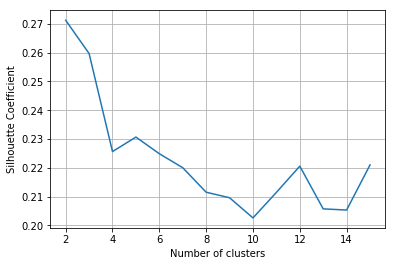

In [43]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 5 based on the SC score. If we take highest SC score, 5 segment solution is best

### Segment Distribution

### Finding Optimal number of clusters (optional)

### Elbow Analysis 

In [59]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( telco_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [60]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,8687.888181
1,3,7108.755977
2,4,6426.590252
3,5,5904.611048
4,6,5518.115668
5,7,5294.985679
6,8,5091.408677
7,9,4906.577123
8,10,4695.911074
9,11,4534.742735


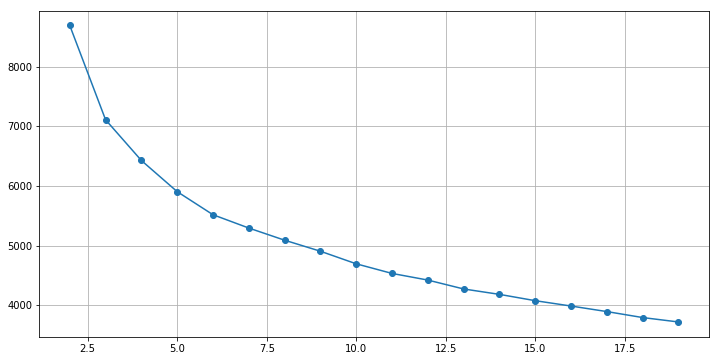

In [61]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

In [82]:
telco_num.cluster_5.value_counts()/sum(telco_num.cluster_5.value_counts())

3    0.284
0    0.243
1    0.211
2    0.184
4    0.078
Name: cluster_5, dtype: float64

In [71]:
km_5.cluster_centers_

array([[ 0.49552819,  0.88224895,  0.7751854 ,  0.77539286, -0.5651227 ,
        -0.50707612, -0.32784051, -0.28507117, -0.18673098,  0.15372818,
        -0.49794793, -0.15839838],
       [ 0.88471868,  0.80287322,  0.85852529,  0.83398695,  1.06397728,
         0.76016285,  1.6094457 ,  1.48843769,  1.26582161,  0.43256489,
         0.50086344,  0.04729037],
       [-0.71537784, -0.74207314, -0.77777915, -0.73607214,  0.52368926,
         1.25414591, -0.33169827, -0.29729323, -0.11739574, -0.50346612,
         0.34390842, -0.31227163],
       [-0.65137251, -0.83657373, -0.72308564, -0.78889422, -0.52785738,
        -0.76307174, -0.58512576, -0.53816694, -0.58434542, -0.48850424,
        -0.40825712, -0.31838004],
       [ 0.12218364, -0.12390192, -0.26988724, -0.06292924, -0.43104765,
        -0.6567351 , -0.41948209, -0.47752172, -0.43792068,  1.31725421,
         0.87160301,  2.26141604]])

# Profiling

In [83]:
telco_num.head()

,tenure,age,address,ed,employ,tollfree,equip,callcard,wireless,multline,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,9,4,5.0,0,0,1,0,0,...,0.0,7.50,0.0,0,1,3,3,1,4,1
1,11,33.0,7,5,5.0,1,0,1,1,0,...,0.0,15.25,35.7,0,0,1,1,0,6,5
2,68,52.0,24,1,29.0,1,0,1,0,0,...,0.0,30.25,0.0,0,2,0,0,4,3,6
3,33,33.0,12,2,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,1,3,3,1,4,1
4,23,30.0,9,1,2.0,0,0,0,0,0,...,0.0,0.00,0.0,0,2,3,3,4,3,6


In [51]:
telco_num.cluster_3.value_counts()/1000

1    0.491
2    0.292
0    0.217
Name: cluster_3, dtype: float64

In [52]:
telco_num.cluster_3.value_counts()*100/sum(telco_num.cluster_3.value_counts())

1    49.1
2    29.2
0    21.7
Name: cluster_3, dtype: float64

In [53]:
pd.Series.sort_index(telco_num.cluster_5.value_counts())

0    243
1    211
2    184
3    284
4     78
Name: cluster_5, dtype: int64

In [54]:
telco_num.cluster_3.size

1000

In [56]:
telco_num.cluster_3.value_counts()/telco_num.cluster_3.size

1    0.491
2    0.292
0    0.217
Name: cluster_3, dtype: float64

In [57]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [58]:
size

0    1000
0     217
1     491
2     292
0     268
1     204
2     194
3     334
0     243
1     211
2     184
3     284
4      78
0      81
1     247
2     184
3     164
4     230
5      94
0     155
1     100
2     171
3     193
4     237
5      66
6      78
0      63
1     198
2      65
3      92
4     168
5      74
6     184
7     156
dtype: int64

In [59]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])

In [60]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.217,0.491,0.292,0.268,0.204,0.194,0.334,0.243,0.211,...,0.066,0.078,0.063,0.198,0.065,0.092,0.168,0.074,0.184,0.156


In [61]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,217.000,491.000,292.000,268.000,204.000,194.000,334.000,243.000,211.000,...,66.000,78.000,63.000,198.000,65.000,92.000,168.000,74.000,184.000,156.000
Seg_Pct,1.0,0.217,0.491,0.292,0.268,0.204,0.194,0.334,0.243,0.211,...,0.066,0.078,0.063,0.198,0.065,0.092,0.168,0.074,0.184,0.156


In [93]:
telco_num.head()

,tenure,age,address,ed,employ,tollfree,equip,callcard,wireless,multline,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,9,4,5.0,0,0,1,0,0,...,0.0,7.50,0.0,0,1,3,3,1,4,1
1,11,33.0,7,5,5.0,1,0,1,1,0,...,0.0,15.25,35.7,0,0,1,1,0,6,5
2,68,52.0,24,1,29.0,1,0,1,0,0,...,0.0,30.25,0.0,0,2,0,0,4,3,6
3,33,33.0,12,2,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,1,3,3,1,4,1
4,23,30.0,9,1,2.0,0,0,0,0,0,...,0.0,0.00,0.0,0,2,3,3,4,3,6


In [62]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [63]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
tenure,35.526000,37.147465,33.657841,37.462329,38.589552,37.000000,30.216495,35.251497,33.893004,37.251185,...,60.939394,25.961538,66.746032,26.974747,58.907692,41.217391,29.642857,26.094595,33.364130,34.032051
age,41.645100,40.797235,40.660020,43.931610,44.186679,41.083333,38.824742,41.587036,42.650288,41.109005,...,52.530455,39.153846,51.080159,40.050606,51.430923,40.217500,38.785714,39.675676,42.538098,39.583333
address,11.520000,10.986175,10.932790,12.904110,13.175373,11.073529,9.247423,11.784431,11.761317,11.033175,...,18.833333,9.410256,21.555556,9.530303,17.984615,12.228261,8.994048,9.729730,11.853261,10.057692
income,73.785700,90.130876,60.267678,84.369418,82.941754,91.727451,63.888969,61.228892,76.785638,91.039810,...,130.301818,88.492821,104.380952,53.201869,127.014154,66.940000,57.785595,89.938378,69.602989,83.916410
ed,2.671000,3.451613,2.600815,2.208904,2.179104,3.406863,3.350515,2.221557,2.201646,3.383886,...,2.378788,2.833333,2.206349,2.176768,2.507692,2.565217,3.279762,2.729730,2.086957,3.621795
employ,10.951100,10.419447,9.572363,13.664555,13.832276,10.676520,7.530979,10.793503,12.452757,10.748863,...,22.091364,9.871923,19.302540,9.257576,20.723385,9.793478,7.285714,10.270405,12.255489,9.070513
retire,0.047000,0.027650,0.040733,0.071918,0.078358,0.029412,0.010309,0.053892,0.045267,0.033175,...,0.181818,0.025641,0.158730,0.045455,0.169231,0.010870,0.011905,0.027027,0.054348,0.012821
gender,0.517000,0.516129,0.527495,0.500000,0.496269,0.524510,0.536082,0.517964,0.477366,0.516588,...,0.530303,0.487179,0.476190,0.494949,0.523077,0.608696,0.547619,0.513514,0.489130,0.506410
reside,2.323000,2.525346,2.248473,2.297945,2.294776,2.514706,2.247423,2.272455,2.288066,2.545024,...,2.454545,2.525641,2.396825,2.282828,2.430769,2.195652,2.226190,2.486486,2.304348,2.423077
tollfree,0.474000,0.843318,0.120163,0.794521,0.835821,0.897059,0.113402,0.134731,0.810700,0.886256,...,0.984848,0.807692,0.301587,0.126263,0.984615,0.163043,0.089286,0.810811,0.793478,0.833333


In [64]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [65]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.000000,217.000000,491.000000,292.000000,268.000000,204.000000,194.000000,334.000000,243.000000,211.000000,...,66.000000,78.000000,63.000000,198.000000,65.000000,92.000000,168.000000,74.000000,184.000000,156.000000
Seg_Pct,1.000000,0.217000,0.491000,0.292000,0.268000,0.204000,0.194000,0.334000,0.243000,0.211000,...,0.066000,0.078000,0.063000,0.198000,0.065000,0.092000,0.168000,0.074000,0.184000,0.156000
tenure,35.526000,37.147465,33.657841,37.462329,38.589552,37.000000,30.216495,35.251497,33.893004,37.251185,...,60.939394,25.961538,66.746032,26.974747,58.907692,41.217391,29.642857,26.094595,33.364130,34.032051
age,41.645100,40.797235,40.660020,43.931610,44.186679,41.083333,38.824742,41.587036,42.650288,41.109005,...,52.530455,39.153846,51.080159,40.050606,51.430923,40.217500,38.785714,39.675676,42.538098,39.583333
address,11.520000,10.986175,10.932790,12.904110,13.175373,11.073529,9.247423,11.784431,11.761317,11.033175,...,18.833333,9.410256,21.555556,9.530303,17.984615,12.228261,8.994048,9.729730,11.853261,10.057692
income,73.785700,90.130876,60.267678,84.369418,82.941754,91.727451,63.888969,61.228892,76.785638,91.039810,...,130.301818,88.492821,104.380952,53.201869,127.014154,66.940000,57.785595,89.938378,69.602989,83.916410
ed,2.671000,3.451613,2.600815,2.208904,2.179104,3.406863,3.350515,2.221557,2.201646,3.383886,...,2.378788,2.833333,2.206349,2.176768,2.507692,2.565217,3.279762,2.729730,2.086957,3.621795
employ,10.951100,10.419447,9.572363,13.664555,13.832276,10.676520,7.530979,10.793503,12.452757,10.748863,...,22.091364,9.871923,19.302540,9.257576,20.723385,9.793478,7.285714,10.270405,12.255489,9.070513
retire,0.047000,0.027650,0.040733,0.071918,0.078358,0.029412,0.010309,0.053892,0.045267,0.033175,...,0.181818,0.025641,0.158730,0.045455,0.169231,0.010870,0.011905,0.027027,0.054348,0.012821
gender,0.517000,0.516129,0.527495,0.500000,0.496269,0.524510,0.536082,0.517964,0.477366,0.516588,...,0.530303,0.487179,0.476190,0.494949,0.523077,0.608696,0.547619,0.513514,0.489130,0.506410


In [66]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [68]:
Profling_output_final.to_csv('C:/Users/tejan/Desktop/Profiling_output.csv')

### Assigning segments to new data (Predicting segment for new data)

In [104]:
new_cust = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/python stats class 20 (Clustering & PCA-FA)/1. Segmentation - Telecom - Class files/Telco_new_cust.csv')

In [105]:
new_cust

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,...,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,...,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,...,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,...,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2
5,2,24,44,0,19,33,3,0,0,1,...,0,0,1,4.65,0.00,26.65,0.00,0.00,1,1
6,2,12,55,1,13,36,1,5,0,1,...,0,0,0,5.95,0.00,26.55,0.00,0.00,0,2
7,1,26,47,0,13,54,3,0,0,0,...,0,0,1,7.10,16.00,38.50,18.00,23.50,1,2
8,2,3,32,0,4,58,2,11,0,0,...,0,1,0,2.75,15.75,29.50,9.25,28.55,1,4
9,2,20,46,0,2,23,5,4,0,1,...,1,1,0,4.75,0.00,0.00,0.00,0.00,1,4


In [106]:
new_cust.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,...,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,...,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,...,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,...,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2


In [110]:
new_cust1 = new_cust.drop(['marital','region','custcat'], axis=1)

In [111]:
new_cust1.head()

,tenure,age,address,income,ed,employ,retire,gender,reside,tollfree,...,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,38,55,12,135,2,24,0,0,4,1,...,1,1,1,1,12.15,31.75,0.00,16.25,0.00,1
1,59,26,3,41,4,1,0,1,3,0,...,0,0,0,0,12.65,0.00,35.10,46.75,29.15,0
2,54,55,1,587,3,33,0,0,1,0,...,1,1,1,1,13.00,0.00,0.00,0.00,0.00,0
3,9,40,13,38,4,7,0,1,1,1,...,1,1,1,1,3.35,21.00,42.40,17.50,59.55,1
4,67,67,38,49,2,10,0,1,2,0,...,0,0,0,0,14.30,0.00,29.25,25.25,0.00,1


In [112]:
new_cust_scaled=sc.transform(new_cust1)

In [113]:
list_var = ['tollmon','callwait','callid','forward','equipmon','internet','wiremon','pager','voice','cardmon','multline','longmon']

In [114]:
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns=new_cust1.columns)

In [115]:
new_cust_scaled = new_cust_scaled[list_var]

In [1]:
# new_cust_scaled.head()

In [117]:
centroids = km_5.cluster_centers_
centroids

array([[ 0.49552819,  0.88224895,  0.7751854 ,  0.77539286, -0.5651227 ,
        -0.50707612, -0.32784051, -0.28507117, -0.18673098,  0.15372818,
        -0.49794793, -0.15839838],
       [ 0.88471868,  0.80287322,  0.85852529,  0.83398695,  1.06397728,
         0.76016285,  1.6094457 ,  1.48843769,  1.26582161,  0.43256489,
         0.50086344,  0.04729037],
       [-0.71537784, -0.74207314, -0.77777915, -0.73607214,  0.52368926,
         1.25414591, -0.33169827, -0.29729323, -0.11739574, -0.50346612,
         0.34390842, -0.31227163],
       [-0.65137251, -0.83657373, -0.72308564, -0.78889422, -0.52785738,
        -0.76307174, -0.58512576, -0.53816694, -0.58434542, -0.48850424,
        -0.40825712, -0.31838004],
       [ 0.12218364, -0.12390192, -0.26988724, -0.06292924, -0.43104765,
        -0.6567351 , -0.41948209, -0.47752172, -0.43792068,  1.31725421,
         0.87160301,  2.26141604]])

In [119]:
km_5.predict(new_cust_scaled)

array([1, 2, 0, 1, 2, 3, 2, 2, 1, 0, 1, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1,
       3, 3, 1, 0, 2, 1, 4, 1, 2, 2, 4, 4, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 2, 0, 3, 2, 1, 3, 0, 1, 0, 2, 1, 2, 3, 0, 3, 1, 1, 4,
       3, 0, 0, 0, 0, 3, 2, 3, 1, 1, 1, 0, 3, 0, 3, 3, 0, 4, 0, 2, 0, 3,
       2, 3, 3, 2, 0, 3, 0, 1, 1, 2, 4, 0], dtype=int32)

In [120]:
new_cust['pred_segment'] = pd.Series(km_5.predict(new_cust_scaled))

In [117]:
new_cust.head(20)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat,pred_segment
0,1,38,55,1,12,135,2,24,0,0,...,1,1,12.15,31.75,0.00,16.25,0.00,1,4,1
1,3,59,26,1,3,41,4,1,0,1,...,0,0,12.65,0.00,35.10,46.75,29.15,0,2,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,13.00,0.00,0.00,0.00,0.00,0,3,0
3,3,9,40,0,13,38,4,7,0,1,...,1,1,3.35,21.00,42.40,17.50,59.55,1,4,1
4,1,67,67,1,38,49,2,10,0,1,...,0,0,14.30,0.00,29.25,25.25,0.00,1,2,2
5,2,24,44,0,19,33,3,0,0,1,...,0,1,4.65,0.00,26.65,0.00,0.00,1,1,3
6,2,12,55,1,13,36,1,5,0,1,...,0,0,5.95,0.00,26.55,0.00,0.00,0,2,2
7,1,26,47,0,13,54,3,0,0,0,...,0,1,7.10,16.00,38.50,18.00,23.50,1,2,2
8,2,3,32,0,4,58,2,11,0,0,...,1,0,2.75,15.75,29.50,9.25,28.55,1,4,1
9,2,20,46,0,2,23,5,4,0,1,...,1,0,4.75,0.00,0.00,0.00,0.00,1,4,0


#  DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [130]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.8, min_samples=8)
db.fit(telco_scaled2)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [131]:
pd.Series(db.labels_).value_counts()

-1    674
 0    122
 3     49
 2     44
 1     42
 6     19
 5     16
 7      9
 4      9
 9      8
 8      8
dtype: int64

In [125]:
# review the cluster labels
db.labels_

array([-1, -1, -1,  0, -1, -1, -1, -1,  6,  1, -1, -1, -1, -1,  0,  2, -1,
       -1,  0, -1, -1, -1, -1,  0,  3, -1, -1, -1,  7,  2,  2, -1, -1,  2,
       -1,  2, -1, -1, -1, -1, -1,  3,  7, -1, -1, -1, -1, -1,  0, -1,  4,
        1, -1, -1, -1, -1,  1,  0, -1,  2, -1, -1,  0, -1, -1,  0,  3, -1,
        0, -1,  0,  2,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  2,
        0,  5, -1, -1,  3, -1, -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1,
        3, -1, -1, -1,  0, -1, -1, -1, -1,  5, -1,  2,  6, -1, -1, -1, -1,
       -1,  0,  0,  0, -1, -1,  1, -1,  2,  2, -1, -1,  0, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  0, -1, -1,
       -1, -1, -1, -1,  0,  2, -1,  3,  3,  0, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  4,  1, -1, -1, -1, -1,  0, -1, -1,  2,  2,  1,  0, -1,
       -1, -1, -1,  0, -1,  2, -1, -1,  0,  0,  6, -1, -1,  0, -1, -1,  1,
       -1,  0, -1, -1, -1,  6,  0,  0,  0, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  0,  3,  0, -1

In [132]:
# save the cluster labels and sort by cluster
telco_num['DB_cluster'] = db.labels_

In [133]:
# review the cluster centers
telco_num.groupby('DB_cluster').mean()

,tenure,age,address,income,ed,employ,retire,gender,reside,tollfree,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
DB_cluster,,,,,,,,,,,,,,,,,,,,,
-1,38.752226,42.191396,12.014837,82.590575,2.801187,11.817509,0.050445,0.522255,2.326409,0.605341,...,16.952671,16.547107,16.531233,0.410979,1.050445,1.261128,1.474777,2.749258,2.618694,4.324926
0,27.877049,41.295084,9.860656,48.770489,1.901639,9.385246,0.065574,0.516393,2.426230,0.049180,...,0.000000,6.764344,0.000000,0.114754,1.000000,3.000000,3.000000,1.163934,3.852459,0.991803
1,47.380952,41.785714,13.904762,62.047619,2.500000,10.571429,0.000000,0.547619,2.261905,0.000000,...,0.000000,11.279762,0.000000,0.190476,1.000000,3.000000,3.119048,2.523810,2.428571,2.857143
2,30.681818,38.068182,9.840909,51.545455,3.454545,6.886364,0.000000,0.522727,2.340909,0.022727,...,29.220455,6.414773,0.000000,0.727273,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
3,31.265306,45.673471,13.755102,71.224484,1.795918,13.571431,0.102041,0.448980,2.204082,1.000000,...,0.000000,14.545918,0.000000,0.020408,2.000000,0.000000,0.000000,4.000000,3.000000,6.000000
4,20.333333,37.666667,6.888889,70.222222,2.666667,10.555556,0.000000,0.222222,2.333333,0.111111,...,0.000000,0.916667,0.000000,0.111111,1.000000,3.000000,3.000000,1.000000,4.000000,1.000000
5,13.312500,36.125000,7.437500,57.062500,2.937500,6.375000,0.000000,0.500000,2.250000,0.000000,...,23.765625,0.000000,0.000000,0.625000,1.000000,3.000000,3.000000,1.000000,4.000000,1.000000
6,16.578947,37.473684,8.315789,42.789474,3.157895,4.368421,0.000000,0.473684,1.894737,0.000000,...,26.068421,2.052632,0.000000,0.736842,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
7,24.111111,33.666667,6.666667,50.222222,2.777778,6.000000,0.000000,0.555556,2.111111,0.111111,...,26.900000,0.000000,0.000000,0.444444,1.000000,3.000000,3.000000,1.000000,2.666667,3.000000
